#Adaline
In this section, an Adaline neural network will be trained to distinguish the Setosa type from the other categories in the iris dataset, which consists of three different types of iris flowers: Setosa, Versicolour, and Virginica.

First, we show a scatter plot of data in two dimensions. For simplicity, we use the first two features, Sepal width and Sepal length. Then, we train an Adaline network on this data. Also, we plot the error change graph, which is (𝑡 − 𝑛𝑒𝑡)^2.


## Setosa Detection

In [ ]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
import copy

In [ ]:
def load_data():
  iris = datasets.load_iris()

  iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
  iris_target = pd.DataFrame(iris.target, columns=['target'])
  target_names = iris.target_names
  iris = pd.concat([iris_data,iris_target],axis=1)

  return target_names, iris

target_names,iris = load_data()
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


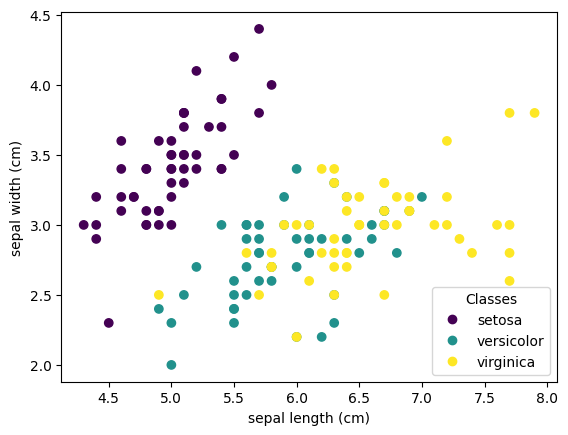

In [ ]:
_, ax = plt.subplots()

scatter = ax.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'], c=iris['target'])

ax.set(xlabel='sepal length (cm)', ylabel='sepal width (cm)')

_ = ax.legend(scatter.legend_elements()[0], target_names, loc="lower right", title="Classes")

In [ ]:
iris['binary_target'] = iris['target'].apply(lambda x: 1 if x == 0 else -1)
iris = iris.drop(['target'],axis=1)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),binary_target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1
146,6.3,2.5,5.0,1.9,-1
147,6.5,3.0,5.2,2.0,-1
148,6.2,3.4,5.4,2.3,-1


In [ ]:
class Adaline():
  def  __init__(self, alpha, epochs):
    self.alpha = alpha # learning rate
    self.epochs = epochs # number of epochs

  def predict_target(self,x):
    h = np.dot(x, self.w[1:]) + self.w[0] # calculate Wx + b
    return np.sign(h) # use sign function as activation function

  def train(self, x,y):
    self.x = x
    self.y = y
    self.w = np.zeros(x.shape[1] + 1) # initialize weights matrix
    self.loss_arr = []
    for i in range(self.epochs):
      output = self.predict_target(x)
      cost = self.y - output # calculate loss
      self.w[1:] = self.w[1:] + self.alpha * np.dot(cost,x) # updating weights
      self.w[0] = self.w[0] + self.alpha * cost.sum() # updating bias
      loss = (cost ** 2 ).sum() / 2.0 # error rate -> which is gonna be plot
      self.loss_arr.append(loss) # appends error of this epoch

    return self.loss_arr, self.w

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,:2], iris.iloc[:,4], test_size=0.2, random_state=42)

[60.0, 80.0, 160.0, 80.0, 80.0, 160.0, 80.0, 80.0, 74.0, 160.0, 80.0, 80.0, 160.0, 80.0, 80.0, 152.0, 80.0, 80.0, 58.0, 80.0, 150.0, 80.0, 80.0, 104.0, 80.0, 22.0, 16.0, 6.0, 2.0, 2.0, 4.0, 2.0, 4.0, 4.0, 2.0, 6.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 6.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 6.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 6.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 6.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 6.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 6.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 6.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 6.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 6.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 6.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 6.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 6.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 6.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 6.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 6.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 6.0, 2.0, 4.0, 4.0, 2.0, 6.0, 2.0, 4.0, 2.0, 6.0, 2.0, 4.0, 2.0, 6.0, 2.0, 4.0, 2.0, 6.0, 2.0, 4.0, 2.0, 6.0, 2.0, 4.0, 4.0, 2.0, 

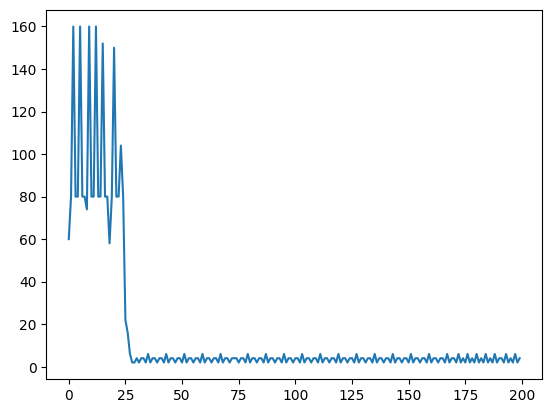

In [ ]:
model = Adaline(alpha=0.001, epochs=200)

loss_arr, w = model.train(X_train, y_train)
print(loss_arr)
plt.plot(loss_arr)
plt.show()

In [ ]:
preds = model.predict_target(X_test)

accuracy_score(y_test, preds)

1.0

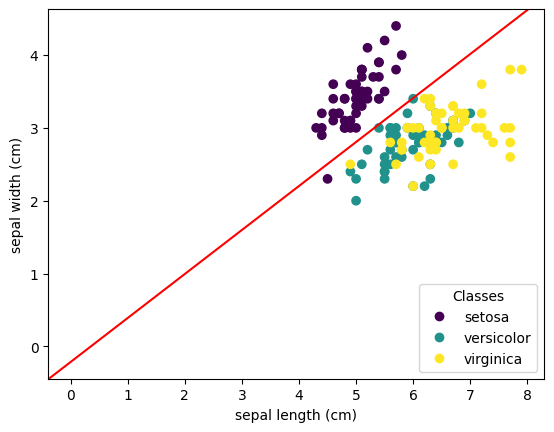

In [ ]:
target_names,iris = load_data()

_, ax = plt.subplots()

scatter = ax.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'], c=iris['target'])

ax.set(xlabel='sepal length (cm)', ylabel='sepal width (cm)')
ax.axline((0, float(-model.w[0] / model.w[2])), slope=-model.w[1] / model.w[2], color="r")

_ = ax.legend(scatter.legend_elements()[0], target_names, loc="lower right", title="Classes")

## Versicolour Detection
Now, we perform the same task for the Versicolour iris, meaning divide the dataset into Versicolour and Non-Versicolour parts and train on these data. Then, we explain the reason for good or bad separation of the data compared to part a.

In [ ]:
target_names, iris = load_data()
iris['binary_target'] = iris['target'].apply(lambda x: 1 if x == 1 else -1)
iris = iris.drop(['target'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,:2], iris.iloc[:,4], test_size=0.33, random_state=42)

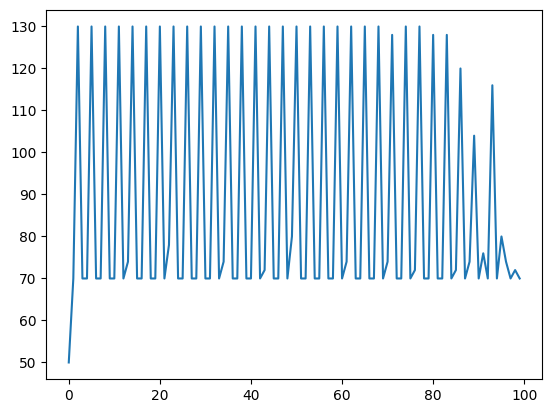

In [ ]:
model = Adaline(alpha=0.001, epochs=100)

loss_arr, w = model.train(X_train, y_train)
plt.plot(loss_arr)
plt.show()

In [ ]:
preds = model.predict_target(X_test)

accuracy_score(y_test, preds)

0.64

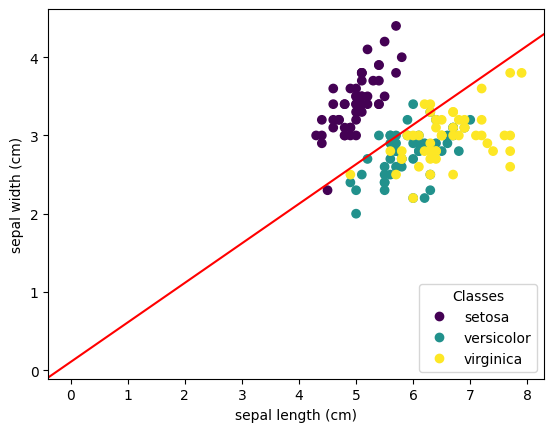

In [ ]:
target_names,iris = load_data()

_, ax = plt.subplots()

scatter = ax.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'], c=iris['target'])

ax.set(xlabel='sepal length (cm)', ylabel='sepal width (cm)')
ax.axline((0, float(-model.w[0] / model.w[2])), slope=-model.w[1] / model.w[2], color="r")

_ = ax.legend(scatter.legend_elements()[0], target_names, loc="lower right", title="Classes")

The reason for the poor performance of the model in the second scenario is that the Versicolour data cannot be linearly separated from the other data. Since Adaline is only suitable for linear separable data, it succeeds in the first scenario where linear separation is possible, but fails in the second scenario.

#Madaline
In this section, the Madaline network is implemented on an artificial dataset.

Madaline is a type of neural network that stands for Many Adaptive Linear Elements. It's designed to learn and classify input patterns into one of the two categories. MRI (Madaline Rule I) is an algorithm used in Madaline networks where weights are adjusted to minimize the error between the desired output and the actual output. It's based on the perceptron learning rule, which adjusts the weights according to the misclassification of training patterns. MRII (Madaline Rule II) is an extension of MRI, where the algorithm adjusts the weights based on both the current input and the previous input.



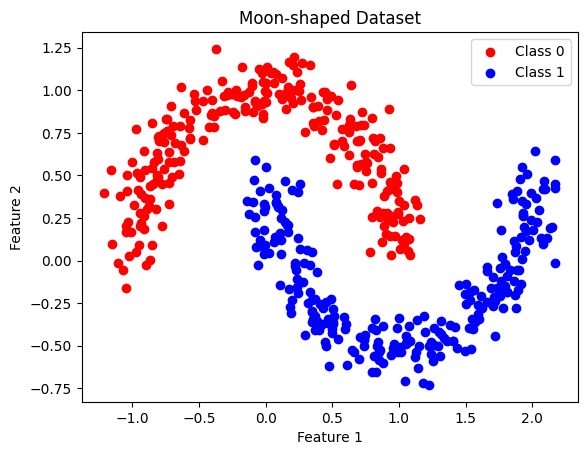

In [ ]:
X_moons, Y_moons = make_moons(n_samples=500, noise=0.1, random_state=42)
plt.scatter(X_moons[Y_moons == 0][:, 0], X_moons[Y_moons == 0][:, 1], color='red',
label='Class 0')
plt.scatter(X_moons[Y_moons == 1][:, 0], X_moons[Y_moons == 1][:, 1], color='blue',
label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Moon-shaped Dataset")
plt.show()

In [ ]:
Y_moons = np.where(Y_moons == 1, 1, -1)
Y_moons

array([ 1, -1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,
       -1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,
       -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,
       -1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1,
       -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1,
       -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1,
       -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1, -1, -1, -1,  1

In [ ]:
X_train_moons, X_test_moons, Y_train_moons, Y_test_moons = train_test_split(X_moons,
Y_moons, test_size=0.5, random_state=3)

In [ ]:
#class madaline
class Madaline:
    def __init__(self, num_l, n_iter=500, learning_rate=0.001):
        self.n_iter = n_iter   #iteration
        self.learning_rate = learning_rate     #learning rate of update weights

        #initial weights for madaline model
        np.random.seed(40)
        self.weights = np.random.rand(num_l, 2)
        self.v = [1] * num_l
        self.b = np.random.rand(num_l, 1)
        self.b2 = num_l - 1

    #define fit function of madaline model
    def fit(self, X, Y):
        count = 0
        self.cost_ = []   #define cost list
        for iter in range(self.n_iter):
            old_weights = copy.deepcopy(self.weights)
            for x, label in zip(X, Y):
                z_in = np.array([np.matmul(x, self.weights.T)]).T + self.b   #output of neurons
                z = np.heaviside(z_in, 1) * 2 - 1
                y_in = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2
                y = np.heaviside(y_in, 1) * 2 - 1
                if y != label:
                    if label == 1:
                        z_j = max(z_in)
                        ind = np.where(z_in == z_j)
                        self.weights[ind, :] = self.weights[ind, :] + self.learning_rate * (1 - z_in[ind]) * np.array(x)  #update weights
                        self.b[ind] = self.b[ind] + self.learning_rate * (1 - z_in[ind])             #update weights
                    else:
                        ind = [i for i, x in enumerate(z_in) if x > 0]
                        for indice in ind:
                            self.weights[indice, :] = self.weights[indice, :] + self.learning_rate * (
                                    -1 - z_in[indice]) * np.array(x)
                            self.b[indice] = self.b[indice] + self.learning_rate * (-1 - z_in[indice])


            self.cost_.append(self.error(self.predict(X), Y))   #append error in cost list

            if np.all((self.weights - old_weights) < 0.0001) and iter > 10:
                count += 1
                if count > 10:
                    print("Total iterations with", len(self.b), "lines:", iter + 1)
                    break
    #define prediction function for madaline model
    def predict(self, X):
        y = []
        for x in X:
            z_in = np.array([np.matmul(x, self.weights.T)]).T + self.b
            z = np.heaviside(z_in, 1) * 2 - 1
            y_in = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2
            y.append(np.heaviside(y_in, 1) * 2 - 1)
        return y
    #define error function for madaline model
    def error(self, net, t):
      self.err = ((t-net)**2).sum()/2.
      return self.err


Accuracy of prediction is: 0.888


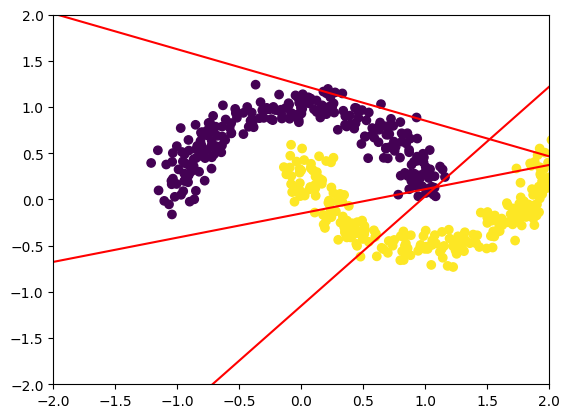

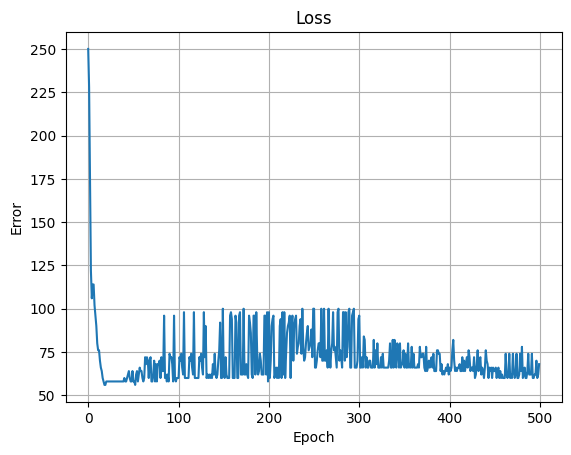

Total iterations with 5 lines: 151
Accuracy of prediction is: 0.86


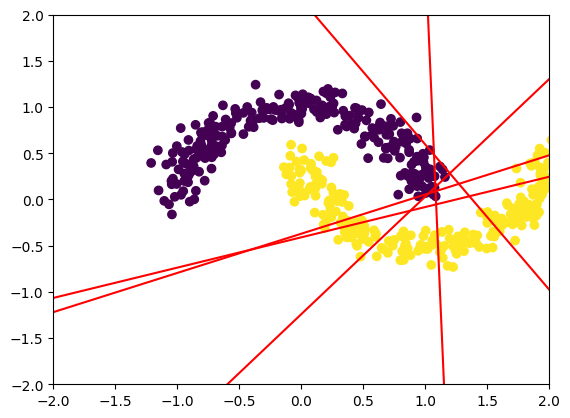

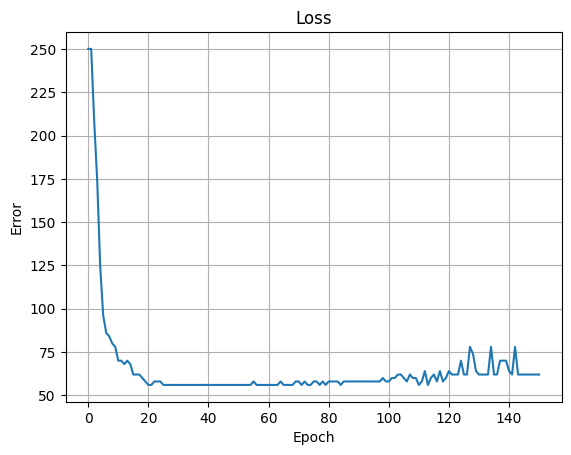

Accuracy of prediction is: 0.868


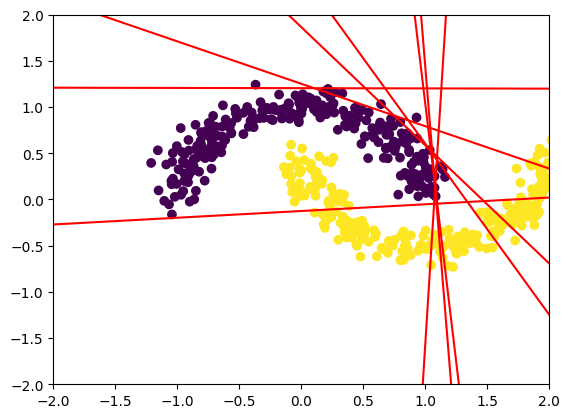

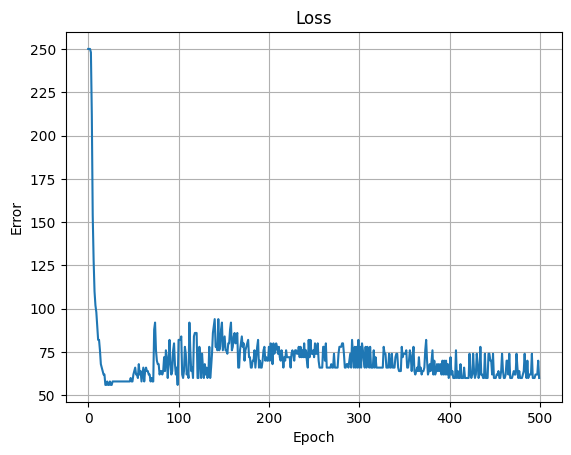

In [ ]:

neuron_counts = [3,5,8]   #number of hidden layer neurons

for i in range(3):
  #define madaline with different number of hidden layer neurons
  madaline = Madaline(neuron_counts[i],learning_rate=0.001)

  #fit madaline on x_train and y_train
  madaline.fit(X_train_moons, Y_train_moons)

  #predict x_test with madaline model
  pred = madaline.predict(X_test_moons)

  #madaline model accuracy
  acc = accuracy_score(pred, Y_test_moons)
  print("Accuracy of prediction is:", acc)
  #plot lines and errors of madaline models
  for i in range(neuron_counts[i]):
    plt.axline((0, float(-madaline.b[i] / madaline.weights[i][1])), slope=-madaline.weights[i][0] / madaline.weights[i][1], color="r")
  plt.scatter(X_moons[:,0], X_moons[:,1], c=Y_moons.reshape(-1))
  plt.xlim([-2, 2])
  plt.ylim([-2, 2])
  plt.show()

  plt.plot(madaline.cost_)
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.grid()
  plt.show()
